In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("atlanta_cleaned_data.csv")

In [3]:
cols_to_drop_for_model = [
    'ID', 'Source', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
    'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Weather_Condition',
    'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Weather_Condition',
    'Wind_Direction', 'YearMonth','End_Lat', 'End_Lng', 'Distance(mi)','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
]

# DataFrame'de mevcut olan sütunları droplamak için kontrol
existing_cols_to_drop = [col for col in cols_to_drop_for_model if col in df.columns]

df_model = df.drop(columns=existing_cols_to_drop)

X = df_model.drop('Severity', axis=1)
y = df_model['Severity']
print("\nÖzellik (X) ve hedef (y) setleri ayrıldı.")
print(f"Modele verilecek nihai özellikler: {list(X.columns)}")

# --- Adım 3: Kategorik Verileri Dönüştürme ---
X = pd.get_dummies(X, drop_first=True)
print(f"Kategorik veriler sayısala dönüştürüldü. Yeni özellik sayısı: {X.shape[1]}")


# --- Adım 4: Veriyi Eğitim ve Test Setlerine Ayırma ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nVeri {len(X_train)} eğitim, {len(X_test)} test satırına ayrıldı.")




Özellik (X) ve hedef (y) setleri ayrıldı.
Modele verilecek nihai özellikler: ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Hour', 'Month', 'Day', 'Rush_Hour', 'Weather_Group']
Kategorik veriler sayısala dönüştürüldü. Yeni özellik sayısı: 34

Veri 50841 eğitim, 12711 test satırına ayrıldı.


# Base Models

## Base RandomForest


Random Forest modeli kuruluyor ve eğitiliyor...
Modelin eğitimi tamamlandı.

--- Temel Model Performans Değerlendirmesi ---

1. Modelin Doğruluğu (Accuracy): 0.7094
2. Kesinlik (Precision): 0.7201
3. Duyarlılık (Recall): 0.7362
4. F1 Skoru: 0.7281

2. Sınıflandırma Raporu:
                 precision    recall  f1-score   support

Ciddi Değil (0)       0.70      0.68      0.69      5994
      Ciddi (1)       0.72      0.74      0.73      6717

       accuracy                           0.71     12711
      macro avg       0.71      0.71      0.71     12711
   weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


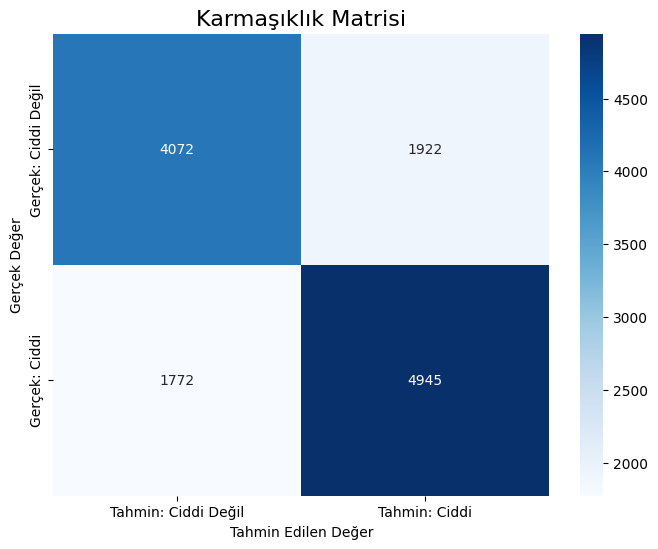

In [4]:
# --- Adım 2: Özellik (X) ve Hedef (y) Belirleme ---
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# --- Adım 5: Modeli Kurma ve Eğitme ---
print("\nRandom Forest modeli kuruluyor ve eğitiliyor...")
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
print("Modelin eğitimi tamamlandı.")

# --- Adım 6: Performansı Değerlendirme ---
print("\n--- Temel Model Performans Değerlendirmesi ---")
y_pred = rf_baseline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n1. Modelin Doğruluğu (Accuracy): {accuracy:.4f}")
print(f"2. Kesinlik (Precision): {precision_score(y_test, y_pred):.4f}")
print(f"3. Duyarlılık (Recall): {recall_score(y_test, y_pred):.4f}")
print(f"4. F1 Skoru: {f1_score(y_test, y_pred):.4f}")


print("\n2. Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, target_names=['Ciddi Değil (0)', 'Ciddi (1)']))

print("\n3. Karmaşıklık Matrisi:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tahmin: Ciddi Değil', 'Tahmin: Ciddi'],
            yticklabels=['Gerçek: Ciddi Değil', 'Gerçek: Ciddi'])
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi', fontsize=16)
plt.show()



--- Model Kararlarında En Etkili Olan Özellikler ---


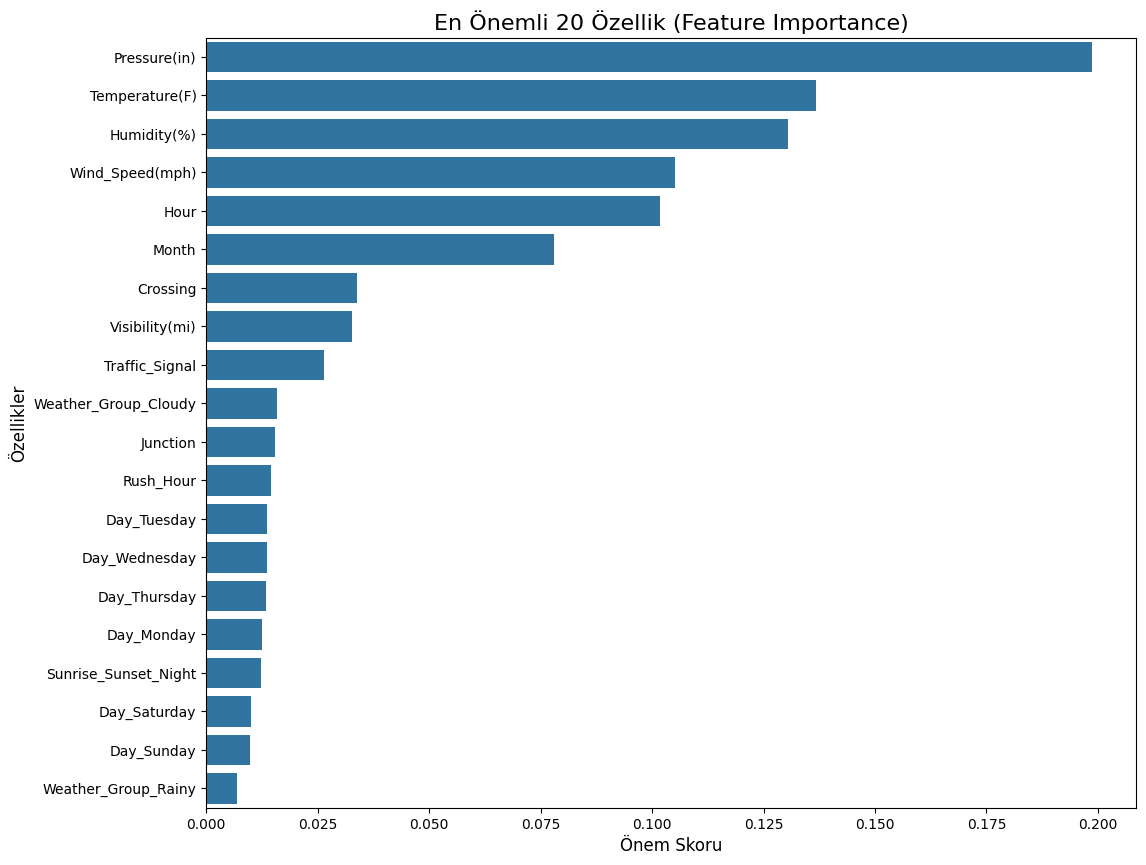

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# --- ÖZELLİK ÖNEM DÜZEYLERİNİ GÖRSELLEŞTİRME ---
print("\n--- Model Kararlarında En Etkili Olan Özellikler ---")

# Özellik isimlerini ve önem skorlarını al
feature_importances = pd.Series(rf_baseline.feature_importances_, index=X_train.columns)

# En önemli 20 özelliği al ve sırala
top_20_features = feature_importances.nlargest(20)

# Görselleştirme
plt.figure(figsize=(12, 10))
sns.barplot(x=top_20_features, y=top_20_features.index)
plt.title('En Önemli 20 Özellik (Feature Importance)', fontsize=16)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.show()

## Base XGBoost

d:\Datalarım\Desktop\Severity-Analysis-and-Prediction-of-Traffic-Accidents-in-Atlanta\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:08:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Modelin eğitimi tamamlandı.

--- XGBoost Model Performans Değerlendirmesi ---

1. XGBoost Modelinin Doğruluğu (Accuracy): 0.7048
2. Kesinlik (Precision): 0.7084
3. Duyarlılık (Recall): 0.7502
4. F1 Skoru: 0.7287

2. Sınıflandırma Raporu:
                 precision    recall  f1-score   support

Ciddi Değil (0)       0.70      0.65      0.68      5994
      Ciddi (1)       0.71      0.75      0.73      6717

       accuracy                           0.70     12711
      macro avg       0.70      0.70      0.70     12711
   weighted avg       0.70      0.70      0.70     12711


3. Karmaşıklık Matrisi:


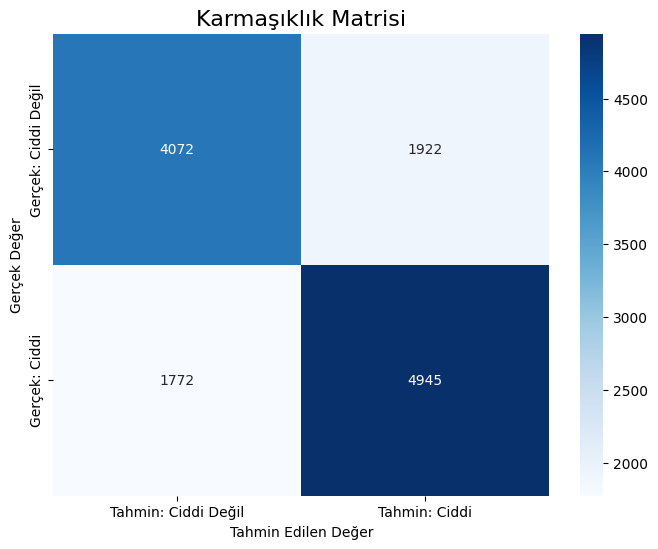

In [6]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
    
xgb_model.fit(X_train, y_train)
print("Modelin eğitimi tamamlandı.")

# --- Adım 5: Performansı Değerlendirme ---
print("\n--- XGBoost Model Performans Değerlendirmesi ---")
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"\n1. XGBoost Modelinin Doğruluğu (Accuracy): {accuracy_xgb:.4f}")
print(f"2. Kesinlik (Precision): {precision_score(y_test, y_pred_xgb):.4f}")
print(f"3. Duyarlılık (Recall): {recall_score(y_test, y_pred_xgb):.4f}")
print(f"4. F1 Skoru: {f1_score(y_test, y_pred_xgb):.4f}")

print("\n2. Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_xgb, target_names=['Ciddi Değil (0)', 'Ciddi (1)']))


print("\n3. Karmaşıklık Matrisi:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tahmin: Ciddi Değil', 'Tahmin: Ciddi'],
            yticklabels=['Gerçek: Ciddi Değil', 'Gerçek: Ciddi'])
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi', fontsize=16)
plt.show()

d:\Datalarım\Desktop\Severity-Analysis-and-Prediction-of-Traffic-Accidents-in-Atlanta\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



SHAP analizi başlıyor...
SHAP değerlerini hesaplamak için 2000 satırlık bir örneklem kullanılıyor...
SHAP değerleri hesaplandı.

SHAP özet grafikleri oluşturuluyor...


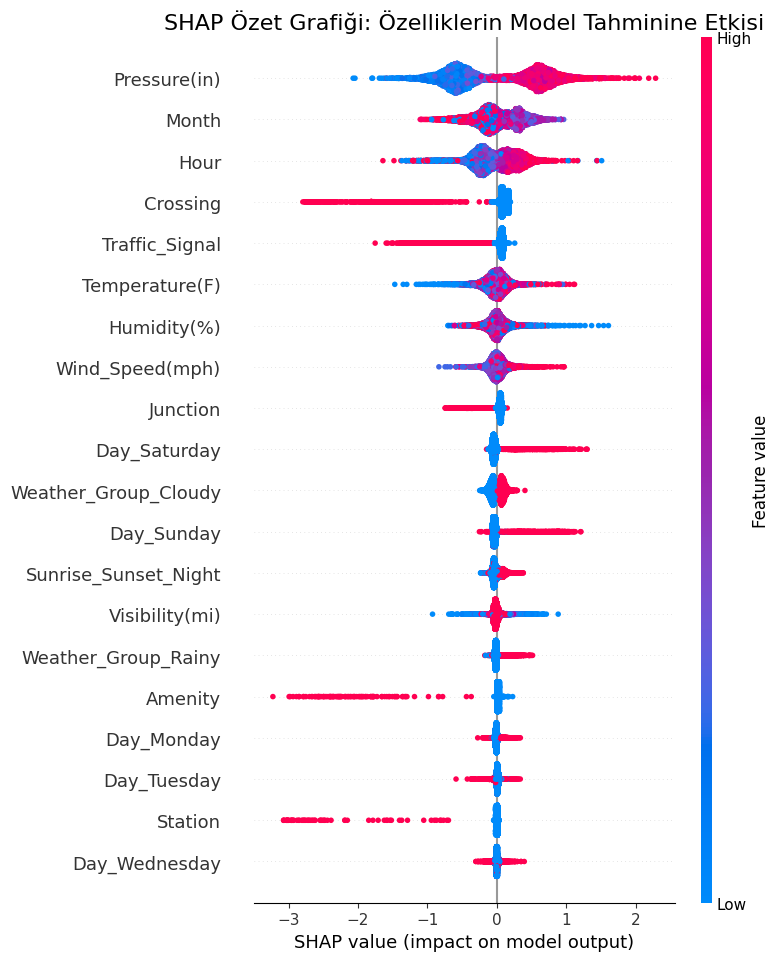

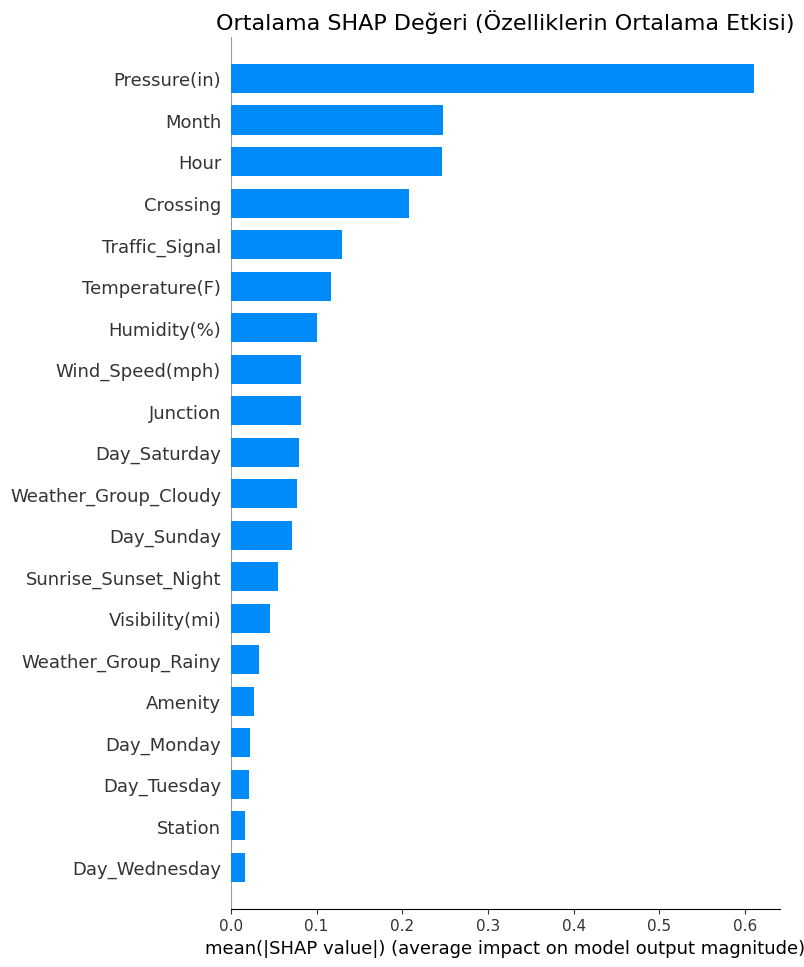

In [7]:
# --- HIZLANDIRILMIŞ SHAP ANALİZİ ---
import shap

print("\nSHAP analizi başlıyor...")
explainer = shap.TreeExplainer(xgb_model)
print("SHAP değerlerini hesaplamak için 2000 satırlık bir örneklem kullanılıyor...")
X_test_sample = X_test
shap_values = explainer.shap_values(X_test_sample)
print("SHAP değerleri hesaplandı.")

# --- SHAP Görselleştirmeleri (DÜZELTİLMİŞ KISIM) ---
print("\nSHAP özet grafikleri oluşturuluyor...")

# 1. SHAP Özet Grafiği (Beeswarm Plot)
shap.summary_plot(shap_values, X_test_sample, plot_type="dot", show=False)
plt.title("SHAP Özet Grafiği: Özelliklerin Model Tahminine Etkisi", fontsize=16)
plt.show()

# 2. Bar Grafiği - Ortalama Etki
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
plt.title("Ortalama SHAP Değeri (Özelliklerin Ortalama Etkisi)", fontsize=16)
plt.show()

# Zaman Analizi

In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Start_Lat'] = pd.to_numeric(df['Start_Lat'], errors='coerce')
df['Start_Lng'] = pd.to_numeric(df['Start_Lng'], errors='coerce')
df.dropna(subset=['Start_Lat', 'Start_Lng', 'Start_Time'], inplace=True)

# --- Adım 1: Veriyi Sıralama ---
df.sort_values(by='Start_Time', inplace=True)
df.reset_index(drop=True, inplace=True)

# --- Adım 2: Gerekli Verileri NumPy Dizilerine Çevirme ---
coords = df[['Start_Lat', 'Start_Lng']].values
times = df['Start_Time'].values
distances_mi = df['Distance(mi)'].values
MILE_TO_KM = 1.60934

In [ ]:
from geopy.distance import great_circle 
from tqdm import tqdm


# --- Adım 3: "Dinamik Geriye Dönük Tarama" ile Özellik Hesaplama ---
print("\n'Dinamik Etki Alanı' özelliği hesaplanıyor (Optimize Edilmiş Yöntem)...")

time_window = pd.Timedelta(hours=1) # 1 saatlik zaman penceresi
is_secondary_list = [0] * len(df) # Başlangıçta hepsi 0

# tqdm ile ilerleme çubuğu
for i in tqdm(range(1, len(df))):
    current_time = times[i]
    current_coord = coords[i]

    # Zamanda geriye doğru tara
    for j in range(i - 1, -1, -1):
        time_diff = current_time - times[j]
        
        if time_diff > time_window:
            break

        dist_km =  great_circle(current_coord, coords[j]).km

        
        if dist_km <= (distances_mi[j] * MILE_TO_KM):
            is_secondary_list[i] = 1
            break 

df['Is_Secondary_Accident'] = is_secondary_list
print("\nHesaplama tamamlandı.")


'Dinamik Etki Alanı' özelliği hesaplanıyor (Optimize Edilmiş Yöntem)...


  0%|          | 0/63551 [00:00<?, ?it/s]

100%|██████████| 63551/63551 [00:06<00:00, 10528.13it/s]


Hesaplama tamamlandı.


In [14]:
# --- Adım 4: Sonuçları Analiz Etme ve Kaydetme ---
secondary_accident_count = df['Is_Secondary_Accident'].sum()
secondary_accident_ratio = df['Is_Secondary_Accident'].mean() * 100

print("\n--- Analiz Sonuçları ---")
print(f"Toplam {len(df)} kazanın {secondary_accident_count} tanesi 'İkincil Kaza' olarak etiketlendi.")
print(f"Bu, tüm kazaların yaklaşık %{secondary_accident_ratio:.2f}'sine denk geliyor.")

domino_file_path = 'Atlanta_Accidents_With_Domino_Effect.csv'
df.to_csv(domino_file_path, index=False)
print(f"\nSon özellikli veri seti '{domino_file_path}' dosyasına başarıyla kaydedildi.")


--- Analiz Sonuçları ---
Toplam 63552 kazanın 9003 tanesi 'İkincil Kaza' olarak etiketlendi.
Bu, tüm kazaların yaklaşık %14.17'sine denk geliyor.

Son özellikli veri seti 'Atlanta_Accidents_With_Domino_Effect.csv' dosyasına başarıyla kaydedildi.



Özellik (X) ve hedef (y) setleri ayrıldı.
Modele verilecek nihai özellikler: ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Hour', 'Month', 'Day', 'Rush_Hour', 'Weather_Group', 'Is_Secondary_Accident']
Kategorik veriler sayısala dönüştürüldü. Yeni özellik sayısı: 35

Veri 50841 eğitim, 12711 test satırına ayrıldı.

Random Forest modeli kuruluyor ve eğitiliyor...
Modelin eğitimi tamamlandı.

--- Temel Model Performans Değerlendirmesi ---

1. Modelin Doğruluğu (Accuracy): 0.7097
2. Kesinlik (Precision): 0.7162
3. Duyarlılık (Recall): 0.7463
4. F1 Skoru: 0.7310

2. Sınıflandırma Raporu:
                 precision    recall  f1-score   support

Ciddi Değil (0)       0.70      0.67      0.68      5994
      Ciddi (1)       0.72      0.75      0.73      6717

       accura

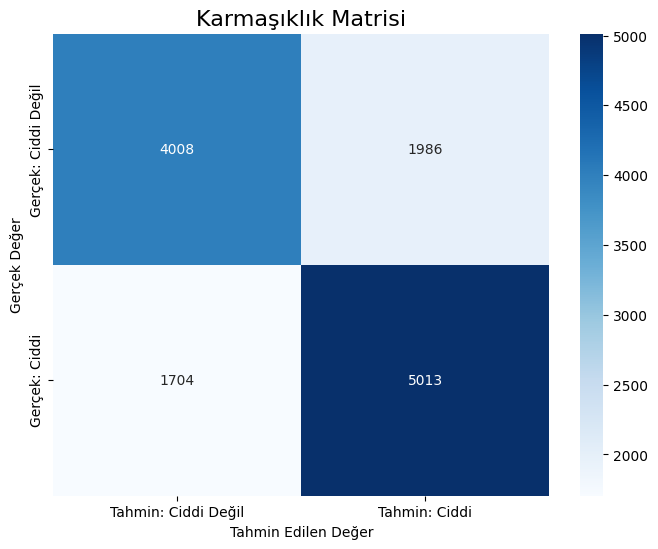

In [15]:
# --- Adım 2: Özellik (X) ve Hedef (y) Belirleme ---

cols_to_drop_for_model = [
    'ID', 'Source', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
    'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Weather_Condition',
    'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Weather_Condition',
    'Wind_Direction', 'YearMonth','End_Lat', 'End_Lng', 'Distance(mi)','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
]

# DataFrame'de mevcut olan sütunları droplamak için kontrol
existing_cols_to_drop = [col for col in cols_to_drop_for_model if col in df.columns]

df_model = df.drop(columns=existing_cols_to_drop)

X = df_model.drop('Severity', axis=1)
y = df_model['Severity']
print("\nÖzellik (X) ve hedef (y) setleri ayrıldı.")
print(f"Modele verilecek nihai özellikler: {list(X.columns)}")

# --- Adım 3: Kategorik Verileri Dönüştürme ---
X = pd.get_dummies(X, drop_first=True)
print(f"Kategorik veriler sayısala dönüştürüldü. Yeni özellik sayısı: {X.shape[1]}")


# --- Adım 4: Veriyi Eğitim ve Test Setlerine Ayırma ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nVeri {len(X_train)} eğitim, {len(X_test)} test satırına ayrıldı.")

# --- Adım 5: Modeli Kurma ve Eğitme ---
print("\nRandom Forest modeli kuruluyor ve eğitiliyor...")
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
print("Modelin eğitimi tamamlandı.")

# --- Adım 6: Performansı Değerlendirme ---
print("\n--- Temel Model Performans Değerlendirmesi ---")
y_pred = rf_baseline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n1. Modelin Doğruluğu (Accuracy): {accuracy:.4f}")
print(f"2. Kesinlik (Precision): {precision_score(y_test, y_pred):.4f}")
print(f"3. Duyarlılık (Recall): {recall_score(y_test, y_pred):.4f}")
print(f"4. F1 Skoru: {f1_score(y_test, y_pred):.4f}")

print("\n2. Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, target_names=['Ciddi Değil (0)', 'Ciddi (1)']))

print("\n3. Karmaşıklık Matrisi:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tahmin: Ciddi Değil', 'Tahmin: Ciddi'],
            yticklabels=['Gerçek: Ciddi Değil', 'Gerçek: Ciddi'])
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi', fontsize=16)
plt.show()



--- Model Kararlarında En Etkili Olan Özellikler ---


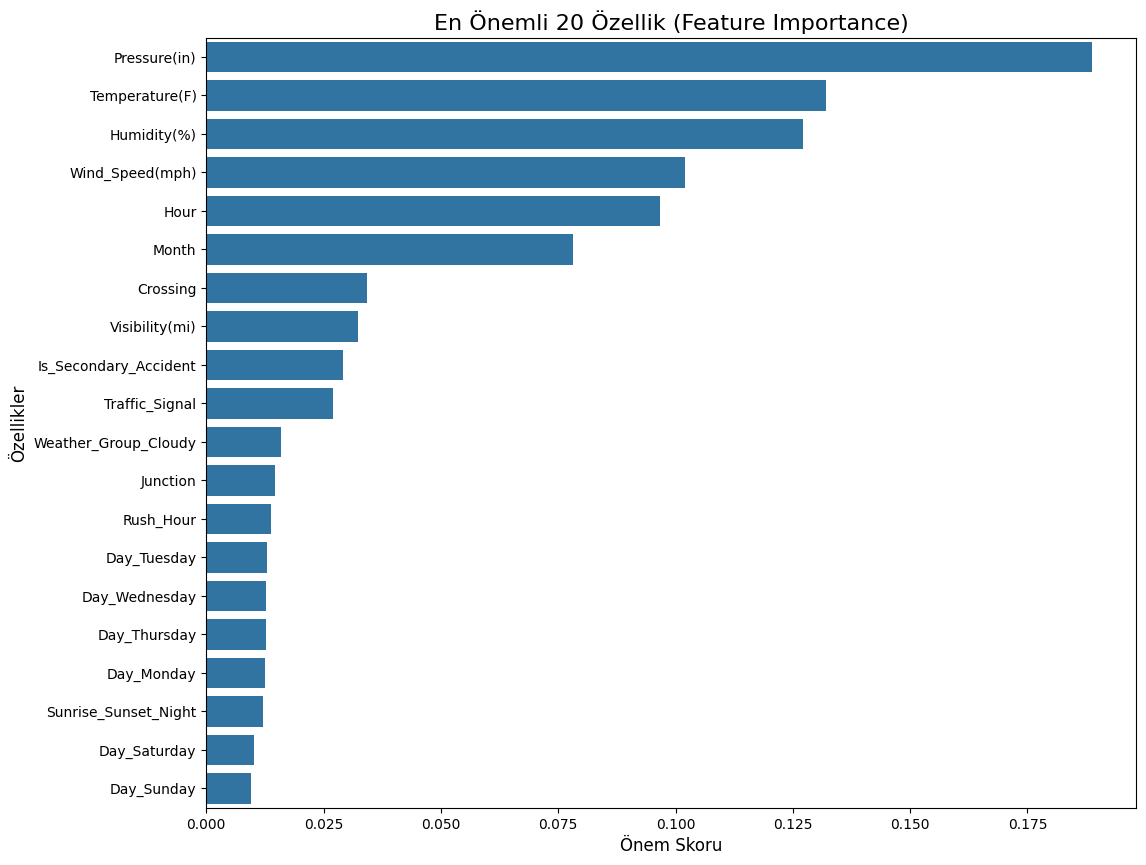

In [16]:
# --- ÖZELLİK ÖNEM DÜZEYLERİNİ GÖRSELLEŞTİRME ---
print("\n--- Model Kararlarında En Etkili Olan Özellikler ---")

# Özellik isimlerini ve önem skorlarını al
feature_importances = pd.Series(rf_baseline.feature_importances_, index=X.columns)

# En önemli 20 özelliği al ve sırala
top_20_features = feature_importances.nlargest(20)

# Görselleştirme
plt.figure(figsize=(12, 10))
sns.barplot(x=top_20_features, y=top_20_features.index)
plt.title('En Önemli 20 Özellik (Feature Importance)', fontsize=16)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.show()

d:\Datalarım\Desktop\Severity-Analysis-and-Prediction-of-Traffic-Accidents-in-Atlanta\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:11:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Modelin eğitimi tamamlandı.

--- XGBoost Model Performans Değerlendirmesi ---

1. XGBoost Modelinin Doğruluğu (Accuracy): 0.7116
2. Kesinlik (Precision): 0.7103
3. Duyarlılık (Recall): 0.7672
4. F1 Skoru: 0.7376

2. Sınıflandırma Raporu:
                 precision    recall  f1-score   support

Ciddi Değil (0)       0.71      0.65      0.68      5994
      Ciddi (1)       0.71      0.77      0.74      6717

       accuracy                           0.71     12711
      macro avg       0.71      0.71      0.71     12711
   weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


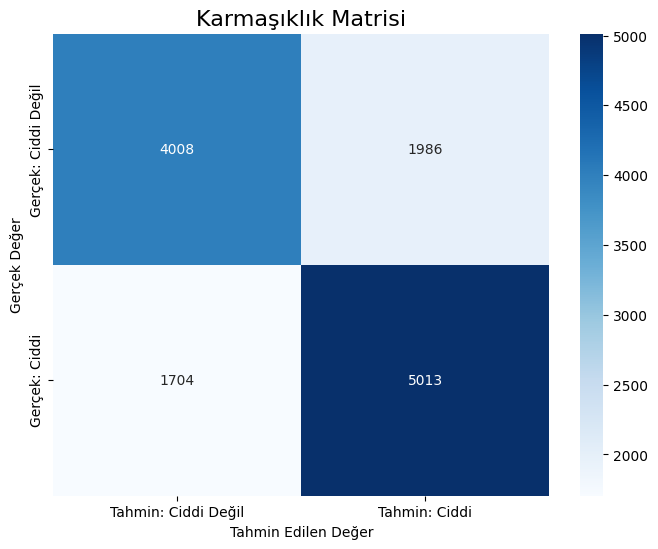

In [17]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
    
xgb_model.fit(X_train, y_train)
print("Modelin eğitimi tamamlandı.")

# --- Adım 5: Performansı Değerlendirme ---
print("\n--- XGBoost Model Performans Değerlendirmesi ---")
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"\n1. XGBoost Modelinin Doğruluğu (Accuracy): {accuracy_xgb:.4f}")
print(f"2. Kesinlik (Precision): {precision_score(y_test, y_pred_xgb):.4f}")
print(f"3. Duyarlılık (Recall): {recall_score(y_test, y_pred_xgb):.4f}")
print(f"4. F1 Skoru: {f1_score(y_test, y_pred_xgb):.4f}")

print("\n2. Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_xgb, target_names=['Ciddi Değil (0)', 'Ciddi (1)']))


print("\n3. Karmaşıklık Matrisi:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tahmin: Ciddi Değil', 'Tahmin: Ciddi'],
            yticklabels=['Gerçek: Ciddi Değil', 'Gerçek: Ciddi'])
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.title('Karmaşıklık Matrisi', fontsize=16)
plt.show()


SHAP analizi başlıyor...
SHAP değerlerini hesaplamak için 2000 satırlık bir örneklem kullanılıyor...
SHAP değerleri hesaplandı.

SHAP özet grafikleri oluşturuluyor...


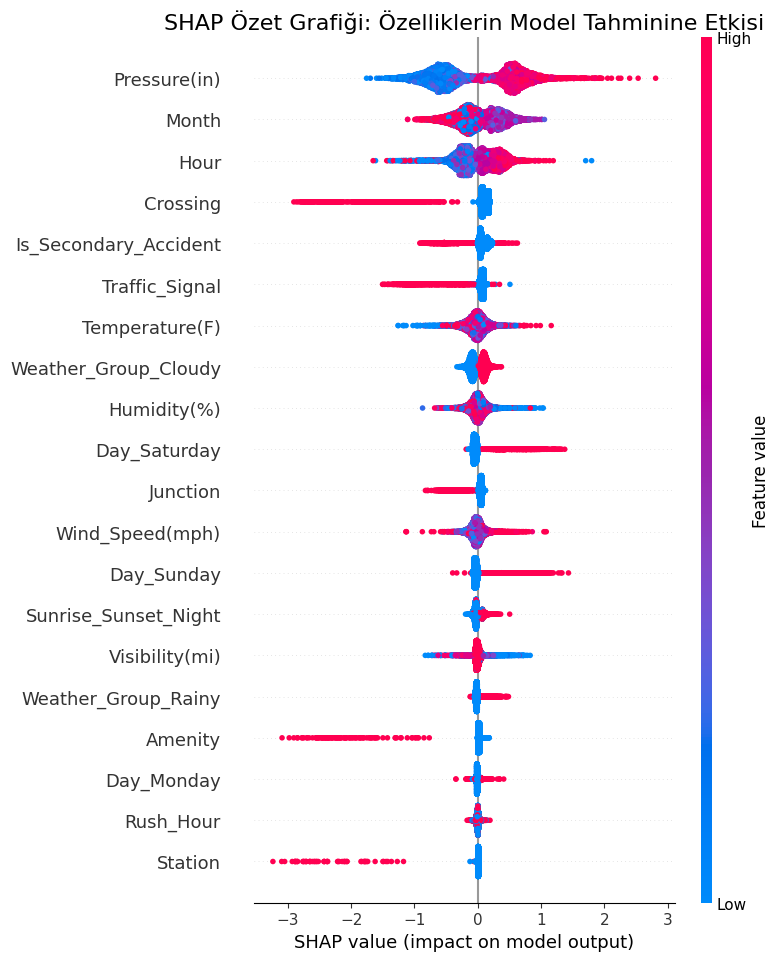

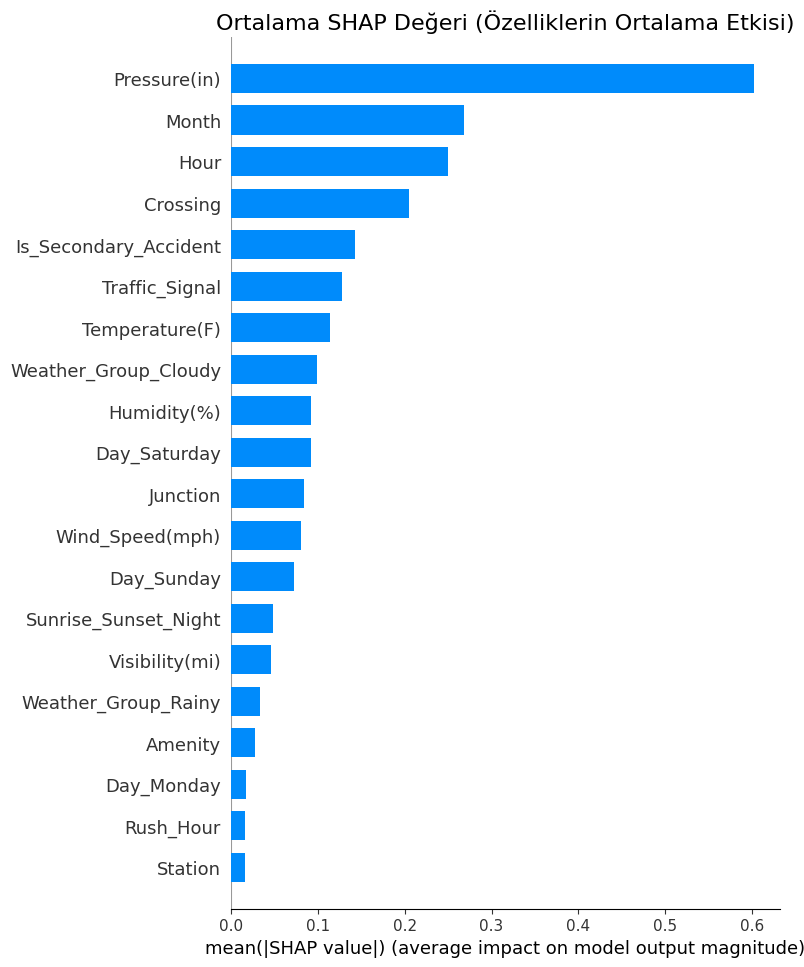

In [ ]:
# --- HIZLANDIRILMIŞ SHAP ANALİZİ ---
import shap


print("\nSHAP analizi başlıyor...")
explainer = shap.TreeExplainer(xgb_model)
print("SHAP değerlerini hesaplamak için 2000 satırlık bir örneklem kullanılıyor...")
X_test_sample = X_test
shap_values = explainer.shap_values(X_test_sample)
print("SHAP değerleri hesaplandı.")

# --- SHAP Görselleştirmeleri (DÜZELTİLMİŞ KISIM) ---
print("\nSHAP özet grafikleri oluşturuluyor...")

# 1. SHAP Özet Grafiği (Beeswarm Plot)
shap.summary_plot(shap_values, X_test_sample, plot_type="dot", show=False)
plt.title("SHAP Özet Grafiği: Özelliklerin Model Tahminine Etkisi", fontsize=16)
plt.show()

# 2. Bar Grafiği - Ortalama Etki
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
plt.title("Ortalama SHAP Değeri (Özelliklerin Ortalama Etkisi)", fontsize=16)
plt.show()

# Konum Analizi

In [21]:
import pandas as pd
import hdbscan
import folium
import numpy as np


df = pd.read_csv("Atlanta_Accidents_With_Domino_Effect.csv")
df_sample = df.copy()

In [ ]:
import pandas as pd
import networkx as nx
import folium

# --- Önceki Analizleri Tekrar Çalıştırarak Merkeziyet Skorlarını Elde Etme ---
edge_file_path = 'Atlanta_Street_Network_Edges.csv'
edge_df_raw = pd.read_csv(edge_file_path)
edge_df_raw['sorted_streets'] = edge_df_raw.apply(lambda row: tuple(sorted((row['Sokak_1'], row['Sokak_2']))), axis=1)
weighted_edges = edge_df_raw['sorted_streets'].value_counts().reset_index()
weighted_edges.columns = ['streets', 'weight']
weighted_edges[['Sokak_1', 'Sokak_2']] = pd.DataFrame(weighted_edges['streets'].tolist(), index=weighted_edges.index)
G_weighted = nx.from_pandas_edgelist(weighted_edges, 'Sokak_1', 'Sokak_2', edge_attr='weight')
betweenness_centrality = nx.betweenness_centrality(G_weighted)
centrality_df = pd.DataFrame({'Betweenness': pd.Series(betweenness_centrality)})

# --- HARİTA GÖRSELLEŞTİRME KISMI ---

try:
    print("Harita oluşturuluyor...")
    atlanta_df_path = 'atlanta_cleaned_data.csv'
    df = pd.read_csv(atlanta_df_path)

    # 1. Eşik Değeri Belirle: En yüksek Aradalığa sahip %5'lik dilim
    threshold = centrality_df['Betweenness'].quantile(0.95)
    
    # 2. Bu eşiğin üzerindeki kritik sokakları belirle
    critical_streets_series = centrality_df[centrality_df['Betweenness'] >= threshold]
    critical_streets_list = critical_streets_series.index.tolist()
    
    print(f"Aradalık skoru {threshold:.4f} eşiğinin üzerinde olan {len(critical_streets_list)} kritik sokak bulundu:")
    print(critical_streets_list)

    # Haritayı Atlanta'nın merkezine odakla
    map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
    critical_map = folium.Map(location=map_center, zoom_start=11, tiles="cartodbpositron")

    # Arka plan olarak tüm kazaları küçük ve soluk gri noktalarla çiz
    df_sample_bg = df.sample(n=15000, random_state=42)
    for _, row in df_sample_bg.iterrows():
        folium.CircleMarker(
            location=[row['Start_Lat'], row['Start_Lng']], radius=1, color='gray', 
            fill_opacity=0.3, fill=True, weight=0
        ).add_to(critical_map)

    # 3. Belirlenen kritik sokaklardaki kazaları büyük ve kırmızı noktalarla çiz
    critical_accidents_df = df[df['Street'].isin(critical_streets_list)]
    critical_accidents_sample = critical_accidents_df.sample(n=min(len(critical_accidents_df), 7000), random_state=42)
    
    for _, row in critical_accidents_sample.iterrows():
        folium.CircleMarker(
            location=[row['Start_Lat'], row['Start_Lng']], radius=2, color='red',
            fill_opacity=0.7, fill=True, weight=1, popup=row['Street']
        ).add_to(critical_map)

    # Haritayı kaydet
    map_path = 'Atlanta_Critical_Streets_Map_Threshold.html'
    critical_map.save(map_path)
    print(f"\nKritik sokakları gösteren interaktif harita '{map_path}' dosyasına kaydedildi.")

except Exception as e:
    print(f"Beklenmedik bir hata oluştu: {e}")


HDBSCAN modeli ile kaza kara noktaları kümeleniyor...


d:\Datalarım\Desktop\Severity-Analysis-and-Prediction-of-Traffic-Accidents-in-Atlanta\myenv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Datalarım\Desktop\Severity-Analysis-and-Prediction-of-Traffic-Accidents-in-Atlanta\myenv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Kümeleme tamamlandı.

Kümelere Göre Kaza Sayıları:
Cluster
-1     23078
 19     1233
 93      758
 24      739
 60      737
       ...  
 46      162
 74      161
 79      153
 70      153
 36      151
Name: count, Length: 109, dtype: int64

Sonuçlar interaktif harita üzerinde görselleştiriliyor...


C:\Users\Ghost\AppData\Local\Temp\ipykernel_5420\445498986.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('gist_rainbow', num_clusters)



İnteraktif harita başarıyla 'Atlanta_Accident_Hotspots.html' dosyasına kaydedildi.
Bu dosyayı bir web tarayıcısında açarak kara noktaları inceleyebilirsiniz.


In [ ]:
import re

junction_df = df[df['Junction'] == True].dropna(subset=['Description']).copy()

edge_list = []
pattern = re.compile(r' on (.+?)(?: at | & )(.+?)(?: - | \.|,|$)')

for index, row in junction_df.iterrows():
    match = pattern.search(row['Description'])
    if match:
        street1 = match.group(1).strip()
        street2 = match.group(2).strip()
        
        if len(street1) > 2 and len(street2) > 2 and street1 != street2:
            edge_list.append((street1, street2))

print(f"{len(edge_list)} adet kesişim (kenar) bulundu.")

edge_df = pd.DataFrame(edge_list, columns=['Sokak_1', 'Sokak_2'])


edge_df.to_csv('Atlanta_Street_Network_Edges.csv', index=False)
print("Sokak ağı kenar listesi 'Atlanta_Street_Network_Edges.csv' dosyasına kaydedildi.")

print("\nİlk 5 kenar örneği:")
print(edge_df.head())

1484 adet kesişim (kenar) bulundu.
Sokak ağı kenar listesi 'Atlanta_Street_Network_Edges.csv' dosyasına kaydedildi.

İlk 5 kenar örneği:
                          Sokak_1                           Sokak_2
0  the shoulder on I-20 Eastbound             Exit 56A McDaniel St.
1            I-85 I-75 Northbound  Exits 249C 249D US-78 North Ave.
2                I-285 Northbound             Exits 9 10A 10B I-20.
3                I-285 Southbound             Exits 9 10A 10B I-20.
4                 I-75 Northbound                      Porsche Ave.


In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


edge_df['sorted_streets'] = edge_df.apply(lambda row: tuple(sorted((row['Sokak_1'], row['Sokak_2']))), axis=1)

weighted_edges = edge_df['sorted_streets'].value_counts().reset_index()
weighted_edges.columns = ['streets', 'weight']

weighted_edges[['Sokak_1', 'Sokak_2']] = pd.DataFrame(weighted_edges['streets'].tolist(), index=weighted_edges.index)

print(f"\n{len(weighted_edges)} adet benzersiz kesişim için ağırlıklar hesaplandı.")
print("En çok kaza olan ilk 5 kesişim:")
print(weighted_edges.head())


G_weighted = nx.from_pandas_edgelist(weighted_edges, 'Sokak_1', 'Sokak_2', edge_attr='weight')

print(f"\nAğırlıklı Ağ oluşturuldu. Düğüm Sayısı: {G_weighted.number_of_nodes()}, Kenar Sayısı: {G_weighted.number_of_edges()}")

print("\nAğırlıklı merkeziyet metrikleri hesaplanıyor...")


degree_centrality_w = {node: val for node, val in G_weighted.degree(weight='weight')}
betweenness_centrality_w = nx.betweenness_centrality(G_weighted, weight=None) 

centrality_df_w = pd.DataFrame({
    'Weighted_Degree': pd.Series(degree_centrality_w),
    'Betweenness': pd.Series(betweenness_centrality_w)
})

print("\n--- EN RİSKLİ SOKAKLAR (Ağırlıklı Dereceye Göre) ---")
print("Bu sokaklar, en yüksek toplam kaza sayısına sahip kesişimlerde yer almaktadır.")
print(centrality_df_w.sort_values(by='Weighted_Degree', ascending=False).head(10))

print("\n--- EN KRİTİK KÖPRÜ SOKAKLAR (Aradalığa Göre) ---")
print(centrality_df_w.sort_values(by='Betweenness', ascending=False).head(10))




579 adet benzersiz kesişim için ağırlıklar hesaplandı.
En çok kaza olan ilk 5 kesişim:
                                     streets  weight                Sokak_1  \
0  (Exits 9 10A 10B I-20., I-285 Southbound)      95  Exits 9 10A 10B I-20.   
1     (Exits 51A 51B I-285., I-20 Eastbound)      71   Exits 51A 51B I-285.   
2   (Exit 4C Hammond Dr., GA-400 Southbound)      51    Exit 4C Hammond Dr.   
3    (Exit 56A McDaniel St., I-20 Eastbound)      46  Exit 56A McDaniel St.   
4     (Exits 51A 51B I-285., I-20 Westbound)      32   Exits 51A 51B I-285.   

             Sokak_2  
0   I-285 Southbound  
1     I-20 Eastbound  
2  GA-400 Southbound  
3     I-20 Eastbound  
4     I-20 Westbound  

Ağırlıklı Ağ oluşturuldu. Düğüm Sayısı: 523, Kenar Sayısı: 579

Ağırlıklı merkeziyet metrikleri hesaplanıyor...

--- EN RİSKLİ SOKAKLAR (Ağırlıklı Dereceye Göre) ---
Bu sokaklar, en yüksek toplam kaza sayısına sahip kesişimlerde yer almaktadır.
                       Weighted_Degree  Betweenness
I

In [25]:
print(centrality_df_w["Weighted_Degree"].mean())
print(centrality_df_w["Weighted_Degree"].median())

5.674952198852773
1.0


## Graph Oluşturma

In [35]:
# --- Adım 1: Merkeziyet Skorlarını Hesapla ---
edge_file_path = 'Atlanta_Street_Network_Edges.csv'
edge_df_raw = pd.read_csv(edge_file_path)
edge_df_raw['sorted_streets'] = edge_df_raw.apply(lambda row: tuple(sorted((row['Sokak_1'], row['Sokak_2']))), axis=1)
weighted_edges = edge_df_raw['sorted_streets'].value_counts().reset_index()
weighted_edges.columns = ['streets', 'weight']
weighted_edges[['Sokak_1', 'Sokak_2']] = pd.DataFrame(weighted_edges['streets'].tolist(), index=weighted_edges.index)
G_weighted = nx.from_pandas_edgelist(weighted_edges, 'Sokak_1', 'Sokak_2', edge_attr='weight')

print("Merkeziyet skorları hesaplanıyor...")
betweenness_centrality = nx.betweenness_centrality(G_weighted)
degree_centrality_w = {node: val for node, val in G_weighted.degree(weight='weight')}
print("Hesaplama tamamlandı.")

# --- Adım 2: Yeni Skalar Özellikleri Oluştur ---
final_file_path = 'atlanta_cleaned_data.csv'
df = pd.read_csv(final_file_path)

# 2a. Betweenness Skoru Özelliği
df['Betweenness_Score'] = df['Street'].map(betweenness_centrality).fillna(0)

# 2b. Ağırlıklı Derece Skoru Özelliği
df['Weighted_Degree_Score'] = df['Street'].map(degree_centrality_w).fillna(0)

print("\nİki yeni Graph Mining özelliği ('Betweenness_Score', 'Weighted_Degree_Score') eklendi.")


Merkeziyet skorları hesaplanıyor...
Hesaplama tamamlandı.

İki yeni Graph Mining özelliği ('Betweenness_Score', 'Weighted_Degree_Score') eklendi.


## RandomForest


--- Model Karşılaştırmaları ---

--- Model 'Betweenness_Score' özelliği ile test ediliyor ---


Modelin Doğruluğu: 0.7101
2. Kesinlik (Precision): 0.7196
3. Duyarlılık (Recall): 0.7396
4. F1 Skoru: 0.7295
Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Ciddi Değil       0.70      0.68      0.69      5994
       Ciddi       0.72      0.74      0.73      6717

    accuracy                           0.71     12711
   macro avg       0.71      0.71      0.71     12711
weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


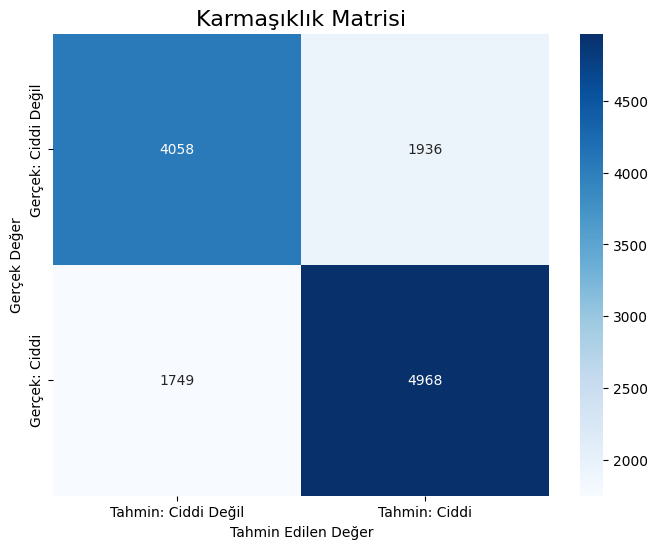


--- Model 'Weighted_Degree_Score' özelliği ile test ediliyor ---
Modelin Doğruluğu: 0.7121
2. Kesinlik (Precision): 0.7223
3. Duyarlılık (Recall): 0.7393
4. F1 Skoru: 0.7307
Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Ciddi Değil       0.70      0.68      0.69      5994
       Ciddi       0.72      0.74      0.73      6717

    accuracy                           0.71     12711
   macro avg       0.71      0.71      0.71     12711
weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


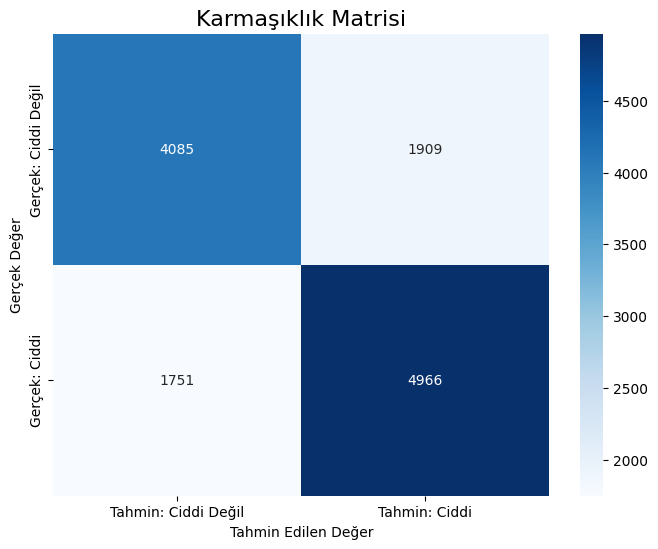


--- Model 'Both_Scores' özelliği ile test ediliyor ---
Modelin Doğruluğu: 0.7140
2. Kesinlik (Precision): 0.7231
3. Duyarlılık (Recall): 0.7435
4. F1 Skoru: 0.7332
Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Ciddi Değil       0.70      0.68      0.69      5994
       Ciddi       0.72      0.74      0.73      6717

    accuracy                           0.71     12711
   macro avg       0.71      0.71      0.71     12711
weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


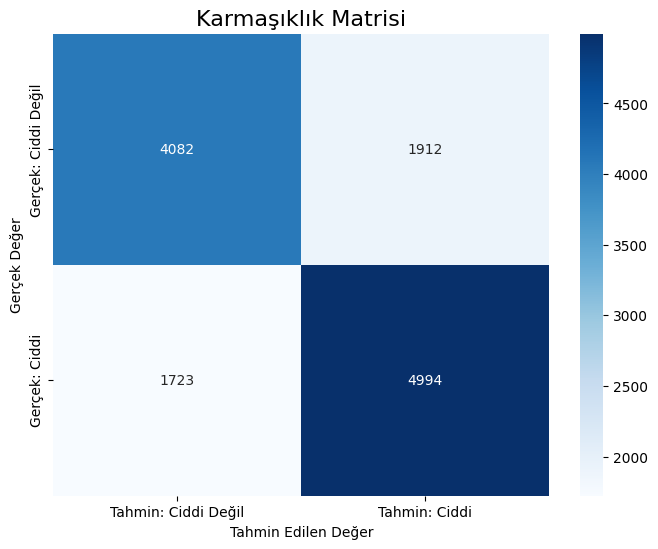


--- NİHAİ SONUÇLAR ---
Temel Modelin Başarısı:                 0.7094
Model + Betweenness Score Başarısı:     0.7101
Model + Weighted Degree Score Başarısı: 0.7121
Model + Her İki Özellik Başarısı:       0.7140


In [ ]:
def train_rf_with_new_feature(dataframe, new_feature_to_use):
    print(f"\n--- Model '{new_feature_to_use}' özelliği ile test ediliyor ---")
    
    # Modelleme için kullanılmayacak sütunları tanımla
    cols_to_drop = [
    'ID', 'Source', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
    'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Weather_Condition',
    'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Weather_Condition',
    'Wind_Direction', 'YearMonth','End_Lat', 'End_Lng', 'Distance(mi)','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
    ]

    # Test etmediğimiz diğer yeni özelliği de listeden çıkaralım
    if new_feature_to_use == 'Betweenness_Score':
        cols_to_drop.append('Weighted_Degree_Score')
    elif new_feature_to_use == 'Weighted_Degree_Score':
        cols_to_drop.append('Betweenness_Score')


    df_model = dataframe.drop(columns=[col for col in cols_to_drop if col in dataframe.columns])
    
    X = df_model.drop('Severity', axis=1, errors='ignore') # 'Is_Severe' hedefimiz
    y = dataframe['Severity'] # Orijinal df'ten alalım
    
    X = pd.get_dummies(X, drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    model = RandomForestClassifier(random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Modelin Doğruluğu: {accuracy:.4f}")
    print(f"2. Kesinlik (Precision): {precision_score(y_test, y_pred):.4f}")
    print(f"3. Duyarlılık (Recall): {recall_score(y_test, y_pred):.4f}")
    print(f"4. F1 Skoru: {f1_score(y_test, y_pred):.4f}")
    print("Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred, target_names=['Ciddi Değil', 'Ciddi']))
    print("\n3. Karmaşıklık Matrisi:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Tahmin: Ciddi Değil', 'Tahmin: Ciddi'],
                yticklabels=['Gerçek: Ciddi Değil', 'Gerçek: Ciddi'])
    plt.ylabel('Gerçek Değer')
    plt.xlabel('Tahmin Edilen Değer')
    plt.title('Karmaşıklık Matrisi', fontsize=16)
    plt.show()
    return accuracy, model,X

# --- Ana Modeli ve Yeni Özellikli Modelleri Çalıştır ---
print("\n--- Model Karşılaştırmaları ---")

# Temel model için 
df_base= df.drop(columns=['Betweenness_Score', 'Weighted_Degree_Score'])
base_accuracy = 0.7094 # Daha önce bulduğumuz skor

# Betweenness skoru ile model
betweenness_accuracy,betweenness_model,X_betweenness = train_rf_with_new_feature(df, 'Betweenness_Score')

# Weighted Degree skoru ile model
degree_accuracy,degree_model,X_degree = train_rf_with_new_feature(df, 'Weighted_Degree_Score')

# Betweenness skoru ve Weighted Degree skoru ile model
both_accuracy,both_model,X_both = train_rf_with_new_feature(df, 'Both_Scores')


print("\n--- NİHAİ SONUÇLAR ---")
print(f"Temel Modelin Başarısı:                 {base_accuracy:.4f}")

print(f"Model + Betweenness Score Başarısı:     {betweenness_accuracy:.4f}")
print(f"Model + Weighted Degree Score Başarısı: {degree_accuracy:.4f}")
print(f"Model + Her İki Özellik Başarısı:       {both_accuracy:.4f}")

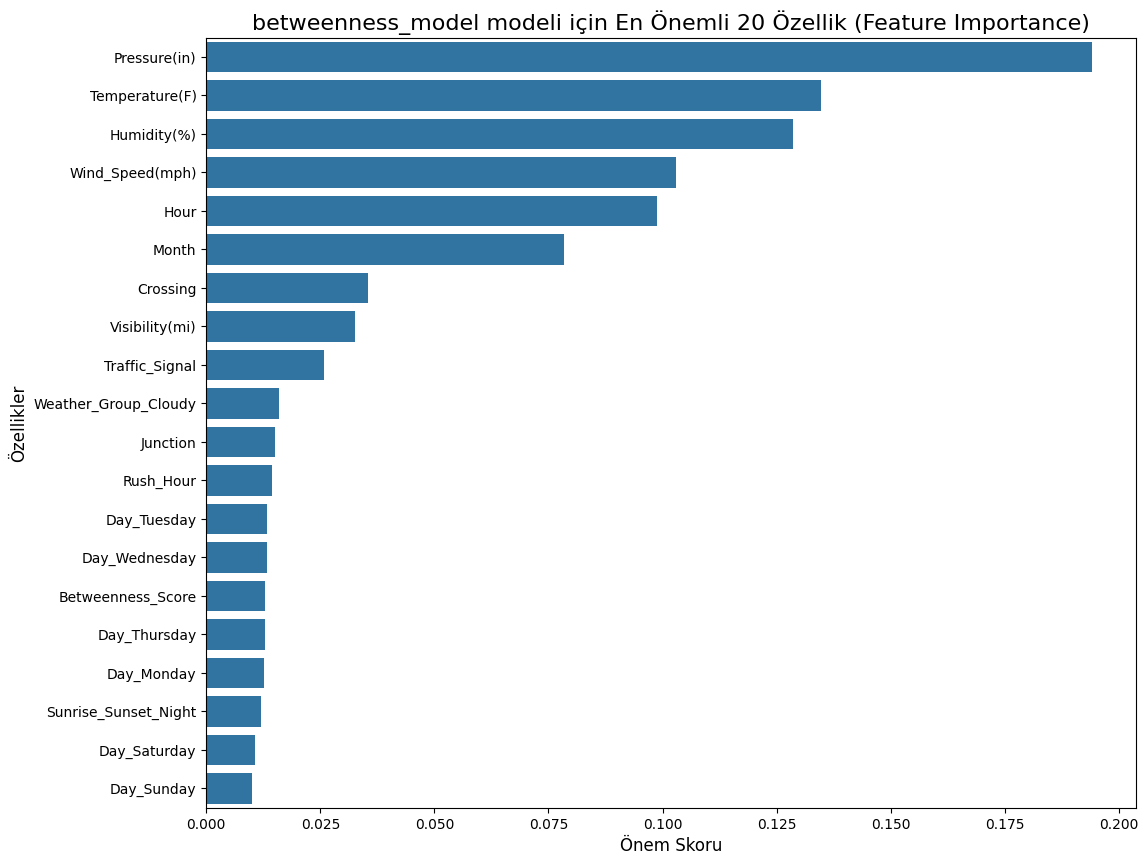

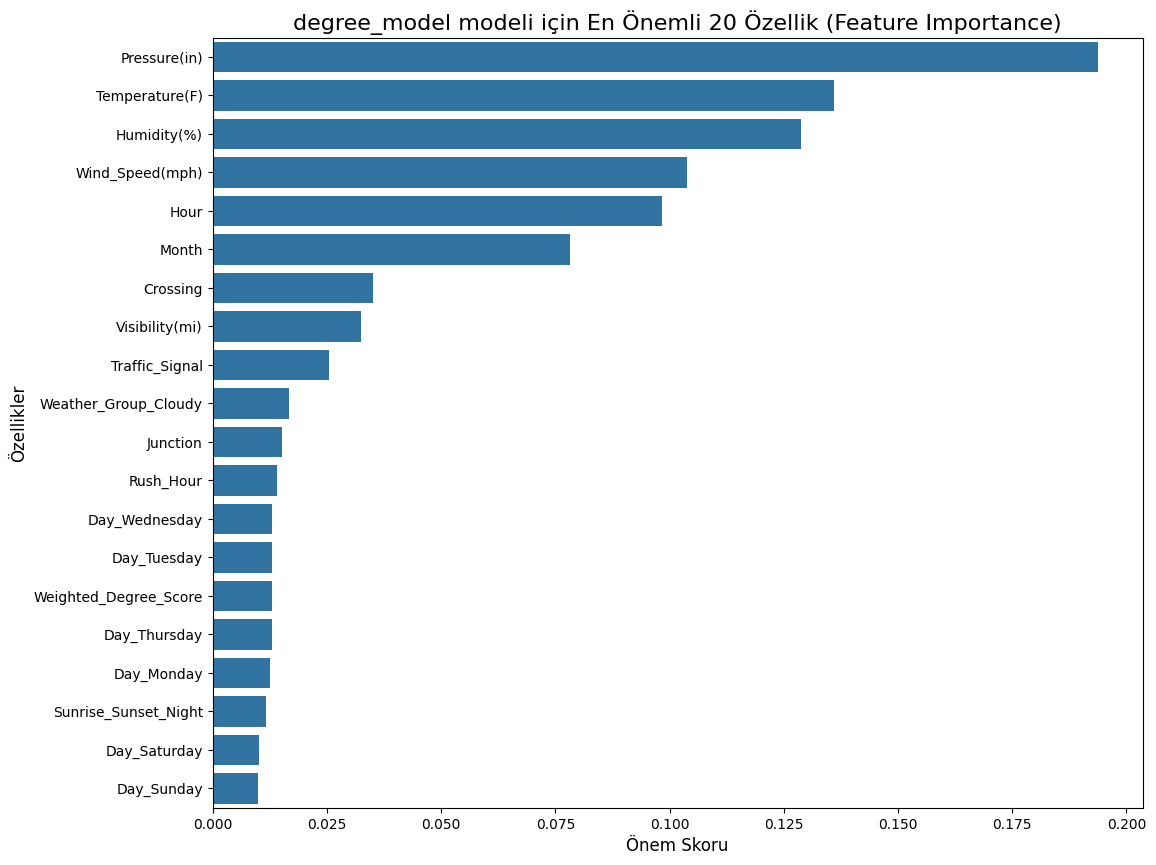

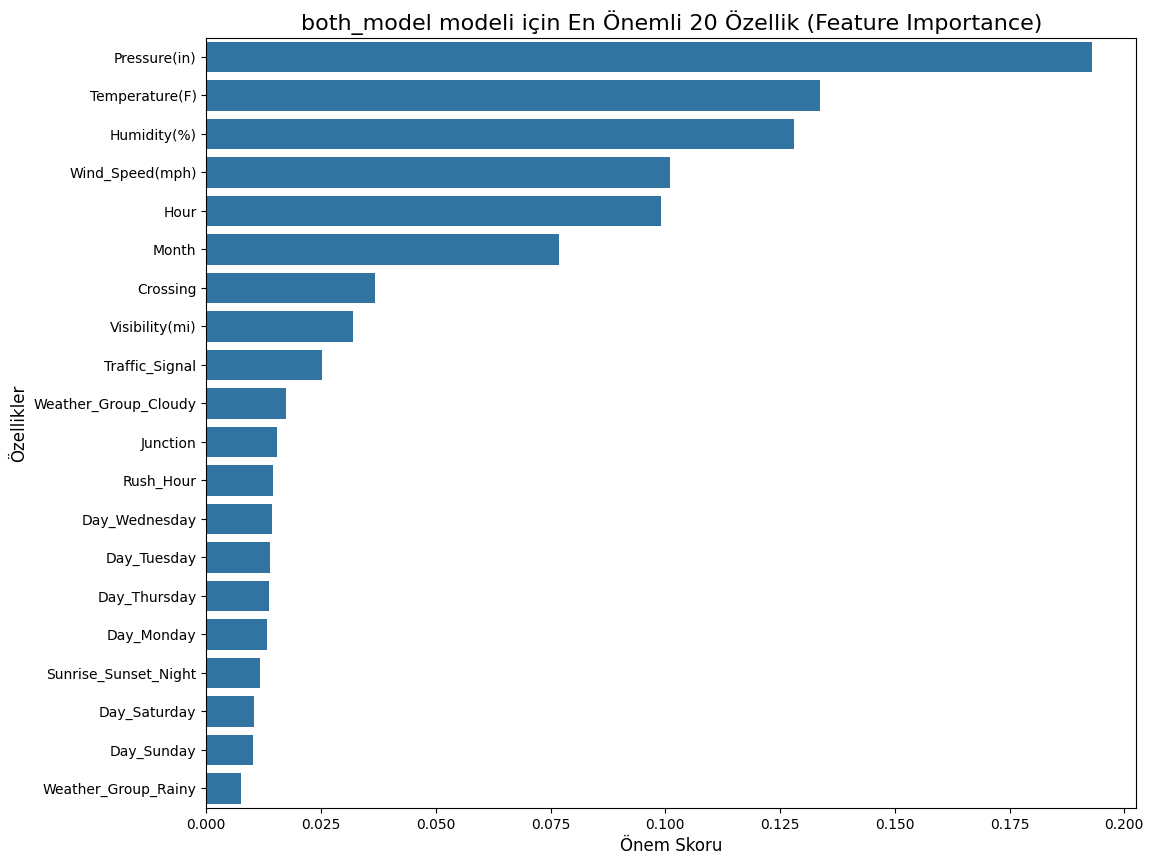

In [37]:
models = [betweenness_model, degree_model, both_model]
model_names = ["betweenness_model", "degree_model", "both_model"]
Xs = [X_betweenness, X_degree, X_both]

for i in range(len(models)):
    model = models[i]
    X = Xs[i]
    model_name = model_names[i]
    # Özellik isimlerini ve önem skorlarını al
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)

    # En önemli 20 özelliği al ve sırala
    top_20_features = feature_importances.nlargest(20)

    # Görselleştirme
    plt.figure(figsize=(12, 10))
    sns.barplot(x=top_20_features, y=top_20_features.index)
    plt.title(f'{model_name} modeli için En Önemli 20 Özellik (Feature Importance)', fontsize=16)
    plt.xlabel('Önem Skoru', fontsize=12)
    plt.ylabel('Özellikler', fontsize=12)
    plt.show()

## XGBoosting


--- Model Karşılaştırmaları ---

--- Model 'Betweenness_Score' özelliği ile test ediliyor ---
Modelin Doğruluğu: 0.7044
2. Kesinlik (Precision): 0.7064
3. Duyarlılık (Recall): 0.7542
4. F1 Skoru: 0.7295
Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Ciddi Değil       0.70      0.65      0.67      5994
       Ciddi       0.71      0.75      0.73      6717

    accuracy                           0.70     12711
   macro avg       0.70      0.70      0.70     12711
weighted avg       0.70      0.70      0.70     12711


3. Karmaşıklık Matrisi:


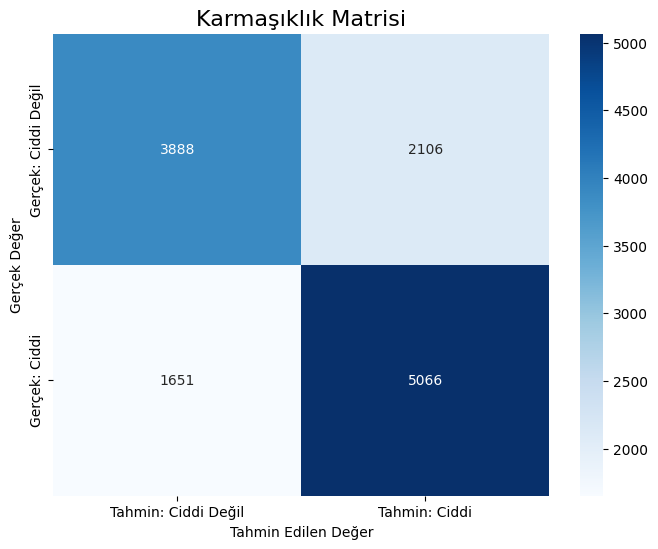


--- Model 'Weighted_Degree_Score' özelliği ile test ediliyor ---
Modelin Doğruluğu: 0.7062
2. Kesinlik (Precision): 0.7094
3. Duyarlılık (Recall): 0.7523
4. F1 Skoru: 0.7302
Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Ciddi Değil       0.70      0.65      0.68      5994
       Ciddi       0.71      0.75      0.73      6717

    accuracy                           0.71     12711
   macro avg       0.71      0.70      0.70     12711
weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


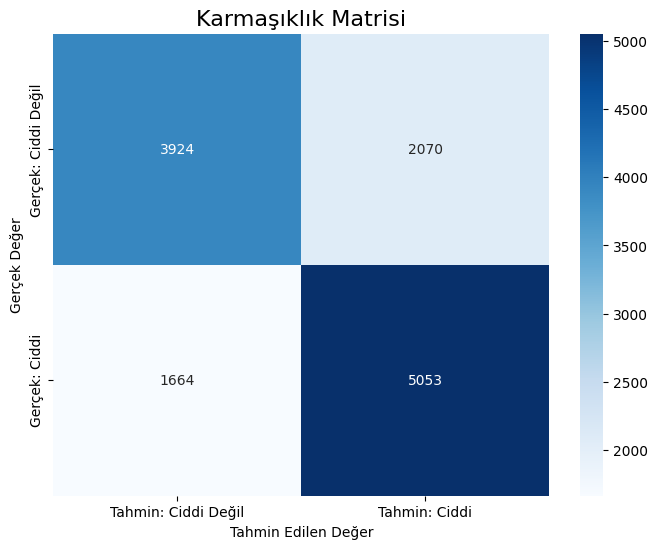


--- Model 'Both_Scores' özelliği ile test ediliyor ---
Modelin Doğruluğu: 0.7062
2. Kesinlik (Precision): 0.7094
3. Duyarlılık (Recall): 0.7520
4. F1 Skoru: 0.7301
Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Ciddi Değil       0.70      0.65      0.68      5994
       Ciddi       0.71      0.75      0.73      6717

    accuracy                           0.71     12711
   macro avg       0.71      0.70      0.70     12711
weighted avg       0.71      0.71      0.71     12711


3. Karmaşıklık Matrisi:


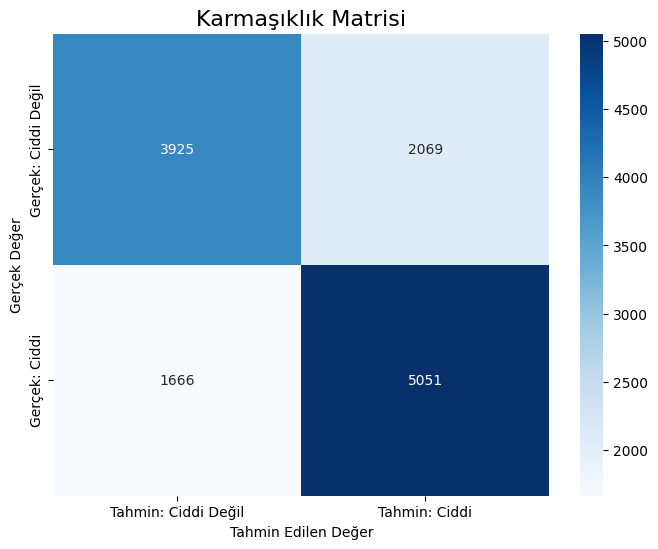


--- NİHAİ SONUÇLAR ---
Temel Modelin Başarısı:                 0.7094
Model + Betweenness Score Başarısı:     0.7044
Model + Weighted Degree Score Başarısı: 0.7062
Model + Her İki Özellik Başarısı:       0.7062


In [ ]:
def train_xgb_with_new_feature(dataframe, new_feature_to_use):
    print(f"\n--- Model '{new_feature_to_use}' özelliği ile test ediliyor ---")
    
    cols_to_drop = [
    'ID', 'Source', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
    'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Weather_Condition',
    'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Weather_Condition',
    'Wind_Direction', 'YearMonth','End_Lat', 'End_Lng', 'Distance(mi)','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
    ]

    if new_feature_to_use == 'Betweenness_Score':
        cols_to_drop.append('Weighted_Degree_Score')
    elif new_feature_to_use == 'Weighted_Degree_Score':
        cols_to_drop.append('Betweenness_Score')


    df_model = dataframe.drop(columns=[col for col in cols_to_drop if col in dataframe.columns])
    
    X = df_model.drop('Severity', axis=1, errors='ignore')
    y = dataframe['Severity'] 
    
    X = pd.get_dummies(X, drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    model = XGBClassifier(random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Modelin Doğruluğu: {accuracy:.4f}")
    print(f"2. Kesinlik (Precision): {precision_score(y_test, y_pred):.4f}")
    print(f"3. Duyarlılık (Recall): {recall_score(y_test, y_pred):.4f}")
    print(f"4. F1 Skoru: {f1_score(y_test, y_pred):.4f}")
    print("Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred, target_names=['Ciddi Değil', 'Ciddi']))
    print("\n3. Karmaşıklık Matrisi:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Tahmin: Ciddi Değil', 'Tahmin: Ciddi'],
                yticklabels=['Gerçek: Ciddi Değil', 'Gerçek: Ciddi'])
    plt.ylabel('Gerçek Değer')
    plt.xlabel('Tahmin Edilen Değer')
    plt.title('Karmaşıklık Matrisi', fontsize=16)
    plt.show()
    return accuracy, model,X

# --- Ana Modeli ve Yeni Özellikli Modelleri Çalıştır ---
print("\n--- Model Karşılaştırmaları ---")

# Temel model için
df_base= df.drop(columns=['Betweenness_Score', 'Weighted_Degree_Score'])
base_accuracy = 0.7094 # Daha önce bulduğumuz skor

# Betweenness skoru ile model
betweenness_accuracy,betweenness_model,X_betweenness = train_xgb_with_new_feature(df, 'Betweenness_Score')

# Weighted Degree skoru ile model
degree_accuracy,degree_model,X_degree = train_xgb_with_new_feature(df, 'Weighted_Degree_Score')

# Betweenness skoru ve Weighted Degree skoru ile model
both_accuracy,both_model,X_both = train_xgb_with_new_feature(df, 'Both_Scores')


print("\n--- NİHAİ SONUÇLAR ---")
print(f"Temel Modelin Başarısı:                 {base_accuracy:.4f}")

print(f"Model + Betweenness Score Başarısı:     {betweenness_accuracy:.4f}")
print(f"Model + Weighted Degree Score Başarısı: {degree_accuracy:.4f}")
print(f"Model + Her İki Özellik Başarısı:       {both_accuracy:.4f}")

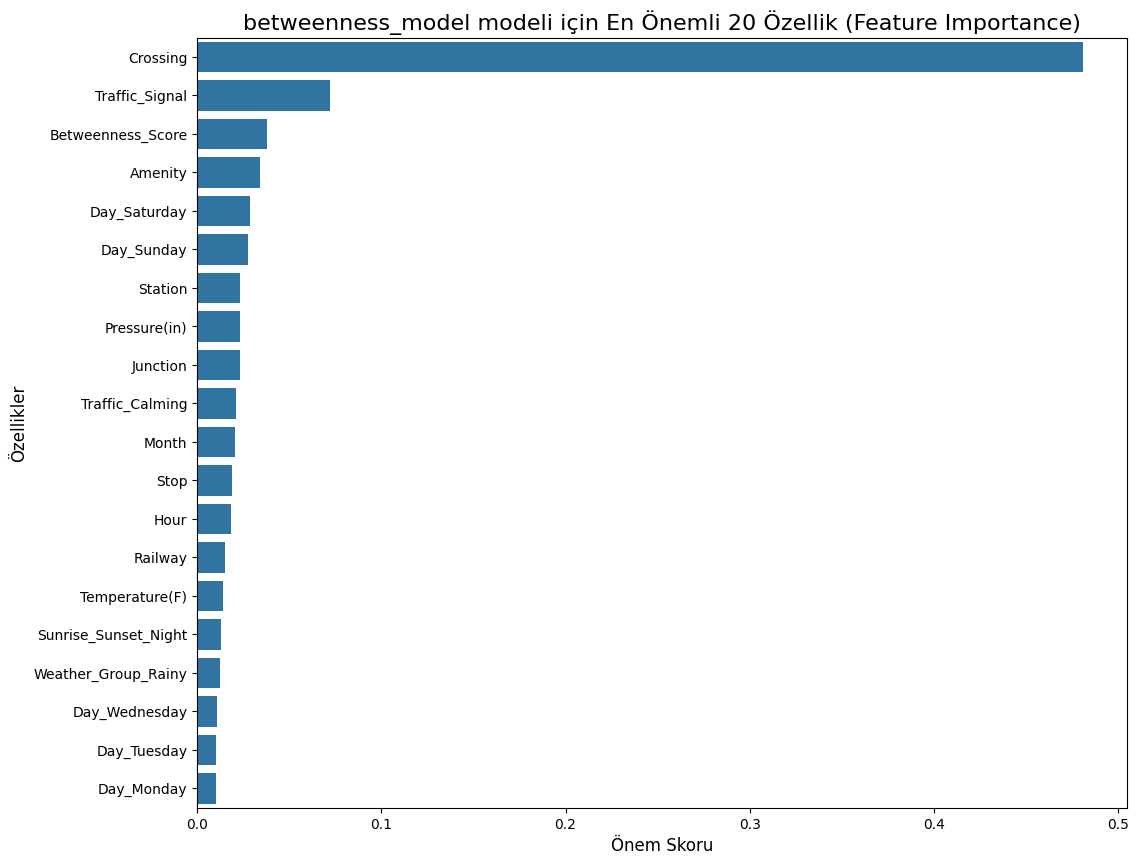

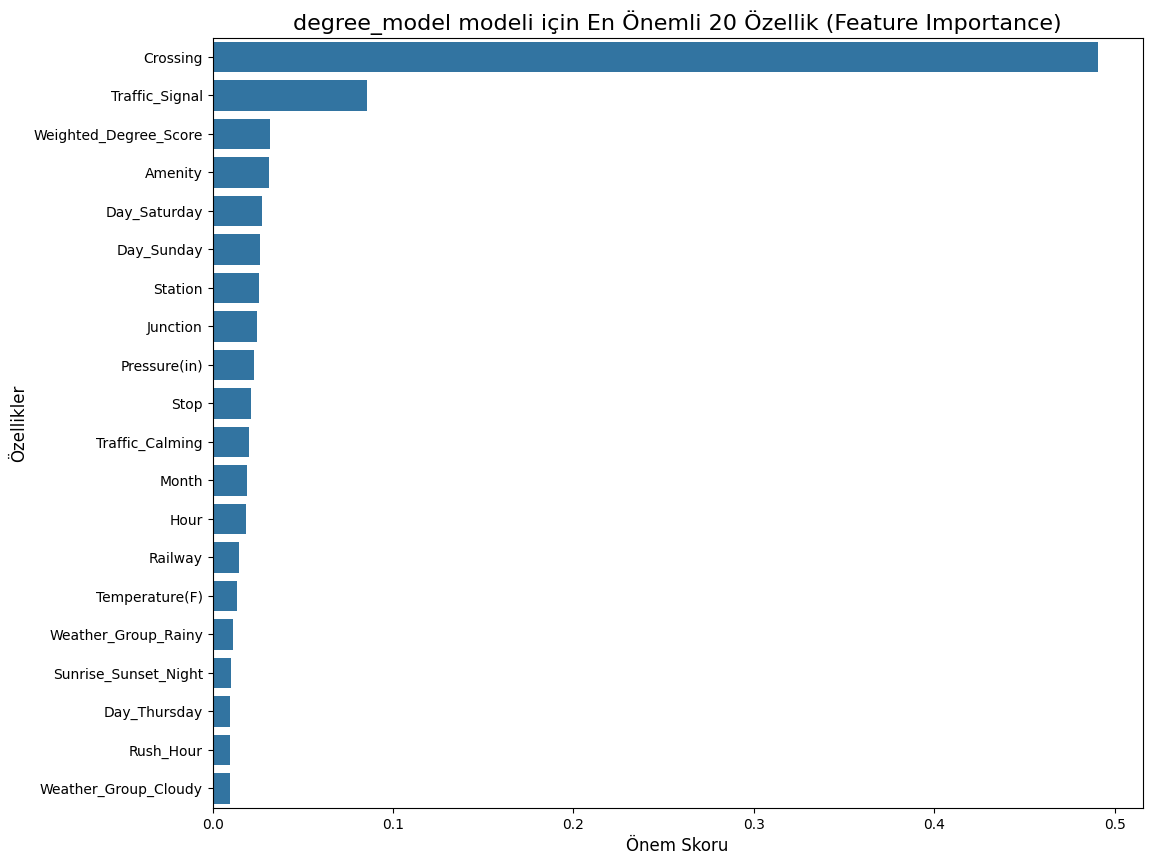

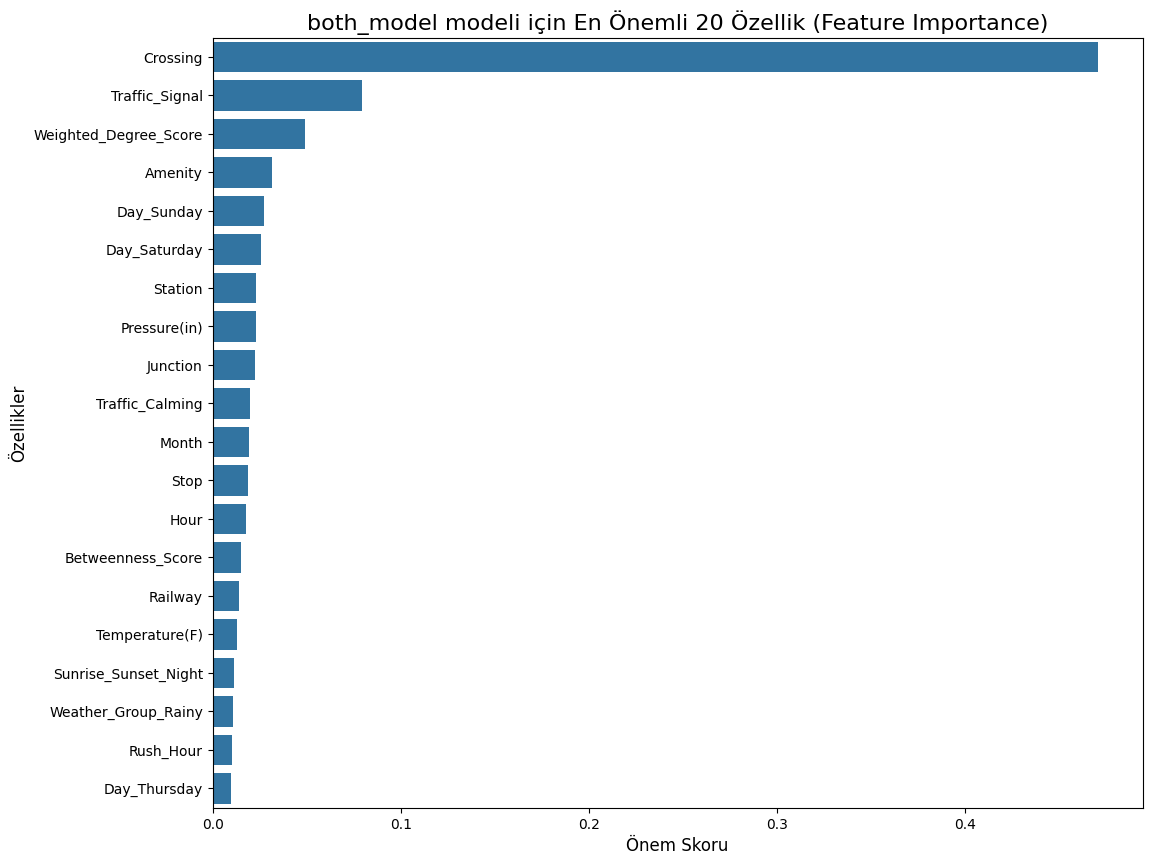

In [39]:
models = [betweenness_model, degree_model, both_model]
model_names = ["betweenness_model", "degree_model", "both_model"]
Xs = [X_betweenness, X_degree, X_both]

for i in range(len(models)):
    model = models[i]
    X = Xs[i]
    model_name = model_names[i]
    # Özellik isimlerini ve önem skorlarını al
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)

    # En önemli 20 özelliği al ve sırala
    top_20_features = feature_importances.nlargest(20)

    # Görselleştirme
    plt.figure(figsize=(12, 10))
    sns.barplot(x=top_20_features, y=top_20_features.index)
    plt.title(f'{model_name} modeli için En Önemli 20 Özellik (Feature Importance)', fontsize=16)
    plt.xlabel('Önem Skoru', fontsize=12)
    plt.ylabel('Özellikler', fontsize=12)
    plt.show()